In [1]:
#Reading Data Using Numpy and Pandas
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
#The data we have extracted from the file
data = pd.read_csv('ex1data2.txt',names=['Size','Bedrooms','Prices'])
data.head(n=10)

,Size,Bedrooms,Prices
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [2]:
#Describing The Data
data.describe()

,Size,Bedrooms,Prices
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [3]:
#Normalizing The Data Using The Method We Learnt
data=((data-data.mean())/data.std())
data.head(n=10)

,Size,Bedrooms,Prices
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389
5,-0.019732,1.090417,-0.323998
6,-0.587240,-0.223675,-0.204036
7,-0.721881,-0.223675,-1.130948
8,-0.781023,-0.223675,-1.026973
9,-0.637573,-0.223675,-0.783051


In [4]:
print(data.head(n=20))

        Size  Bedrooms    Prices
0   0.130010 -0.223675  0.475747
1  -0.504190 -0.223675 -0.084074
2   0.502476 -0.223675  0.228626
3  -0.735723 -1.537767 -0.867025
4   1.257476  1.090417  1.595389
5  -0.019732  1.090417 -0.323998
6  -0.587240 -0.223675 -0.204036
7  -0.721881 -0.223675 -1.130948
8  -0.781023 -0.223675 -1.026973
9  -0.637573 -0.223675 -0.783051
10 -0.076357  1.090417 -0.803053
11 -0.000857 -0.223675  0.052682
12 -0.139273 -0.223675 -0.083283
13  3.117292  2.404508  2.874981
14 -0.921956 -0.223675 -0.643896
15  0.376643  1.090417  0.875619
16 -0.856523 -1.537767 -0.323998
17 -0.962223 -0.223675 -1.123743
18  0.765468  1.090417  1.276275
19  1.296484  1.090417  2.068039


In [5]:
#Now Converting The Data To The Matrix
Size=data['Size'].values
Bedrooms=data['Bedrooms'].values
Prices=data['Prices'].values
m=len(Prices)
x0=np.ones(m)
X=np.array([x0,Size,Bedrooms]).T
theta=np.array([0,0,0])
Y=np.array(Prices)

In [6]:
iters=1000000
alpha=0.00001
def computeCost(X, Y, theta):  
    inner = np.sum((X.dot(theta) - Y)**2)/(2*m)
    return inner


In [7]:
computeCost(X,Y,theta)

0.48936170212765967

In [8]:
def gradientDescent(X,Y,theta,alpha,iters):
    costHis=[0]*iters
    for iteration in range(iters):
        #Hypothesis Value
        hypothesis=X.dot(theta)
        #Difference Between The Values
        loss=hypothesis-Y
        gradient=X.T.dot(loss)/m
        #Changing The Theta
        theta=theta-alpha*gradient
        #The New Cost Value
        cost=computeCost(X,Y,theta)
        costHis[iteration]=cost
    return theta,costHis

In [9]:
newTheta,costHistory=gradientDescent(X,Y,theta,alpha,10000)
print(newTheta)

[-9.41138420e-18  7.86426834e-02  3.91055761e-02]


In [10]:
print(costHistory[-1])

0.412087250913438


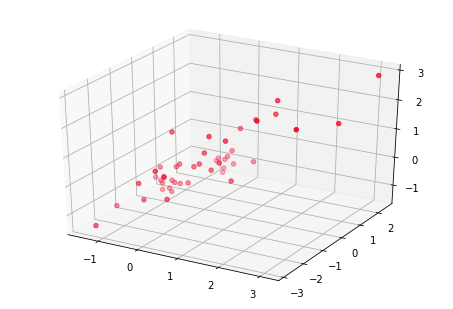

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = mpl.figure()
ax = Axes3D(fig)
ax.scatter(Size, Bedrooms, Prices, color='#ef1234')
mpl.show()